# Power Transformer:
    1.Box-Cox
    2.Yeo-Johnson

# Whenever we get the data we should check weather its normally distributed or not and if it is not distribute we use 2 method:
    1. Function transformer 
    2. power transformer 
mostly power transformer is used when we dont have normal distributed data     

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.shape

(1030, 9)

In [6]:
df.describe() # here we are checking weather we have value smaller than 0 or 0 because if we have that box-cox cannot be applied

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [8]:
x_train , x_test , y_train , y_test =train_test_split(x,y,random_state=42)

In [9]:
lr=LinearRegression()

In [10]:
# Calculating r2 score without applying transformer
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6249829353885576

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


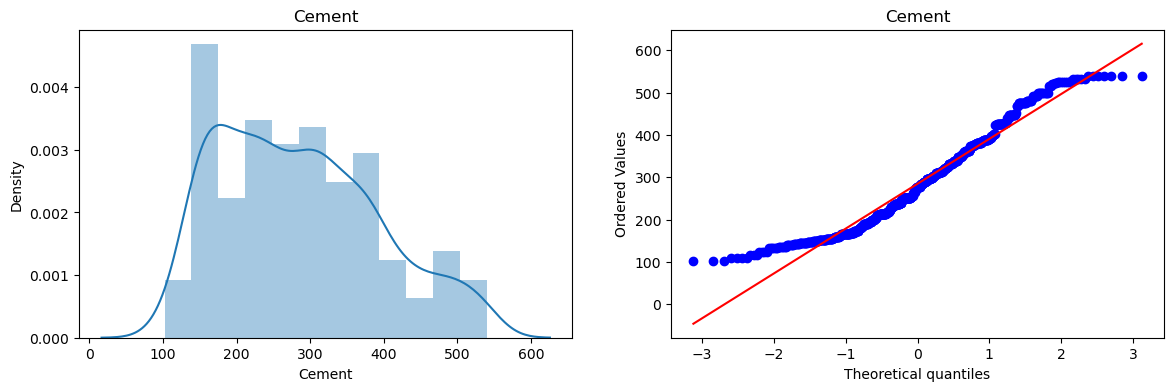

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


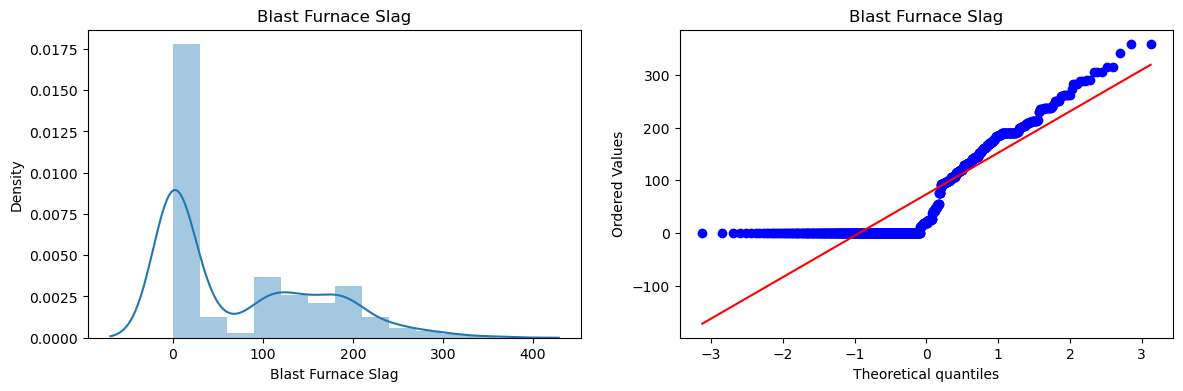

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


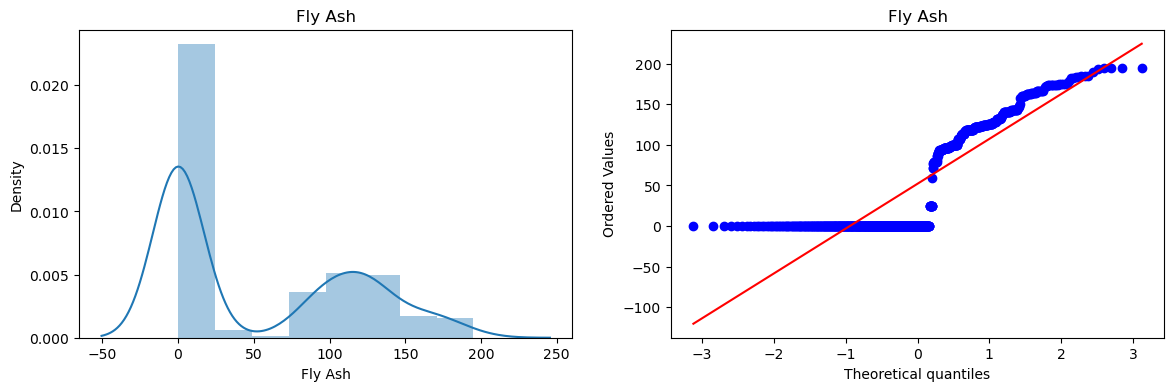

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


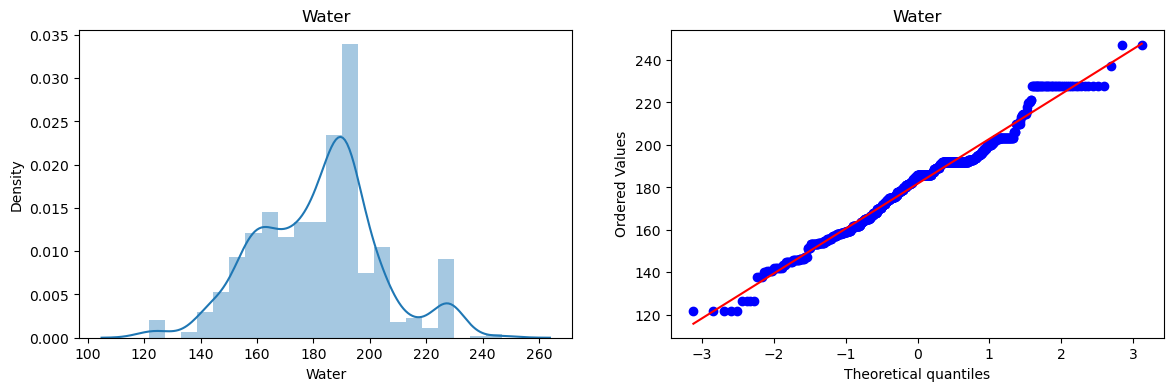

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


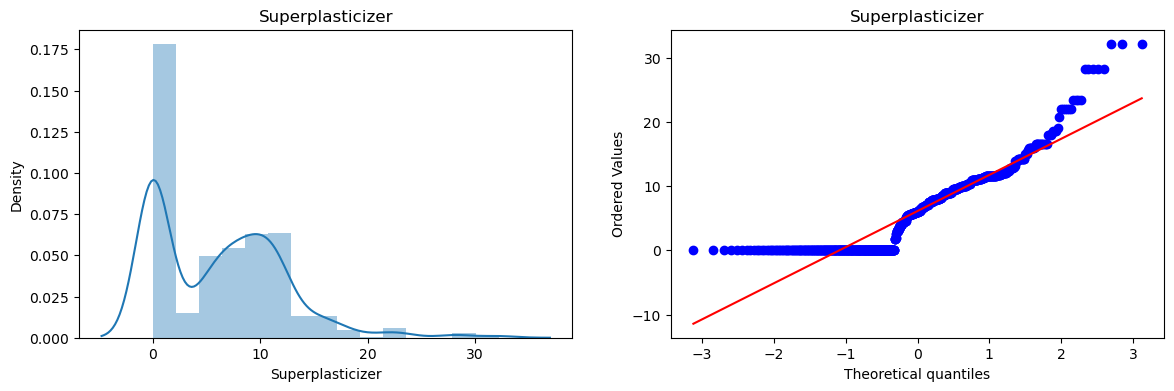

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


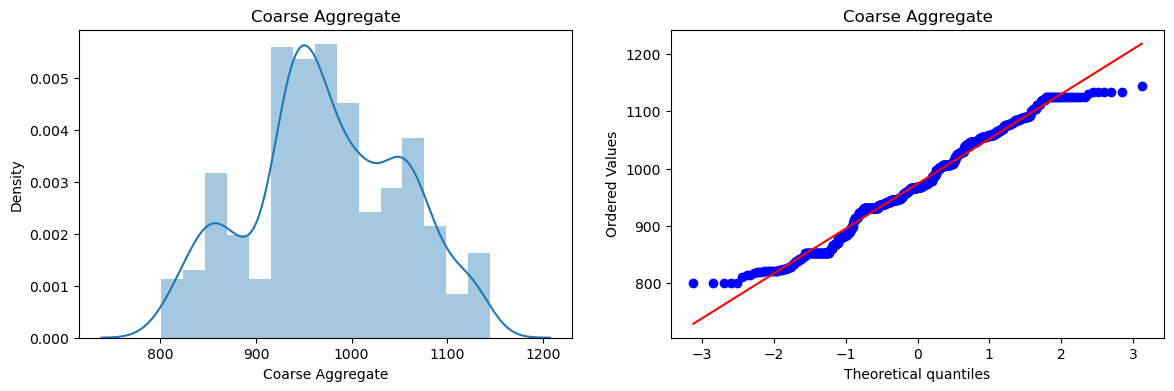

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


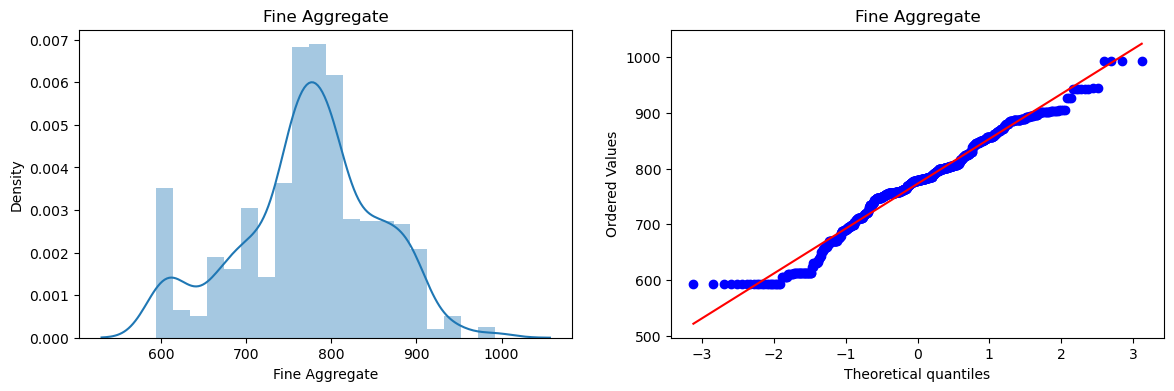

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1220431009.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


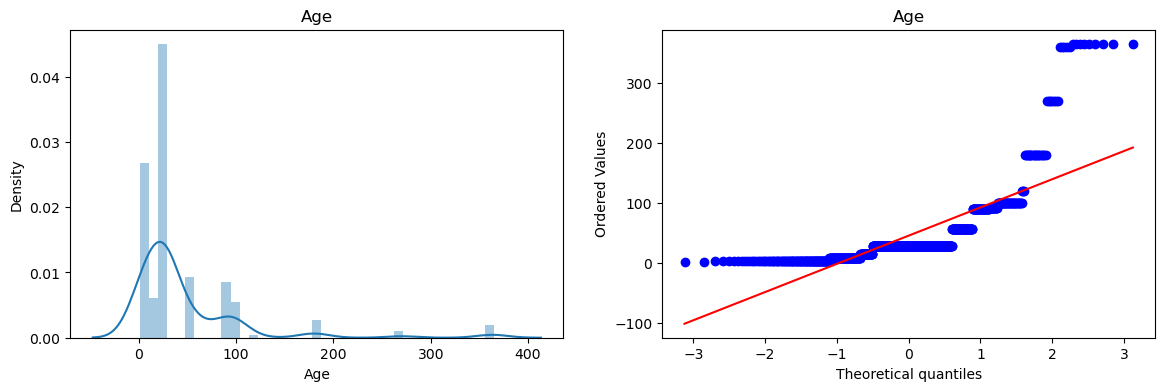

In [11]:
# checking distribution of every column of data 

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

In [12]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [13]:
# Applying power transformer
pt=PowerTransformer(method="box-cox",standardize=True)
x_train_transformed=pt.fit_transform(x_train+0.000001) # as we have some 0 value so we addded this small value
x_test_transformed=pt.transform(x_test+0.000001)

In [14]:
# after transformation we get numy array , so to visualise we have to convert it into dataframe
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed=pd.DataFrame(x_test_transformed,columns=x_test.columns)

In [15]:
pt.lambdas_ # these are all the lambdas value for every coloum as these methods calculate the lambdas

array([ 0.19455894,  0.02032666, -0.04335469,  0.85123122,  0.09429853,
        1.12638402,  1.85922978,  0.06643222])

In [16]:
{col:x_train.columns,"box-cox lambdas":pt.lambdas_} # every column with there respected lambda value that is calculated by the box cox method

{'Age': Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
        'Coarse Aggregate', 'Fine Aggregate', 'Age'],
       dtype='object'),
 'box-cox lambdas': array([ 0.19455894,  0.02032666, -0.04335469,  0.85123122,  0.09429853,
         1.12638402,  1.85922978,  0.06643222])}

In [17]:
pd.DataFrame({"coumn":x_train.columns,"box-cox lambdas":pt.lambdas_})# converted into dataframe of every column's lambda value

,coumn,box-cox lambdas
0,Cement,0.194559
1,Blast Furnace Slag,0.020327
2,Fly Ash,-0.043355
3,Water,0.851231
4,Superplasticizer,0.094299
5,Coarse Aggregate,1.126384
6,Fine Aggregate,1.859230
7,Age,0.066432


# this mean that for eg cement[0]=540, so 540^0.194 (540 ki power 0.194) , this will be the transformation

In [18]:
# linear regresion before transformed data
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Prediction before transformation is:",r2_score(y_test,y_pred))



# linear regresion after transformed data
lr.fit(x_train_transformed,y_train)
y_pred2=lr.predict(x_test_transformed)
print("Prediction after transformation is",r2_score(y_test,y_pred2))

Prediction before transformation is: 0.6249829353885576
Prediction after transformation is 0.7957391672983671


In [19]:
# Here we can easily see that after applying box cox transformation our r2score increased

# visualizing after and before transformation

/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1036037212.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
/var/folders/s4/ml_p60116zjb00n_yp90k4r80000gn/T/ipykernel_61134/1036037212.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


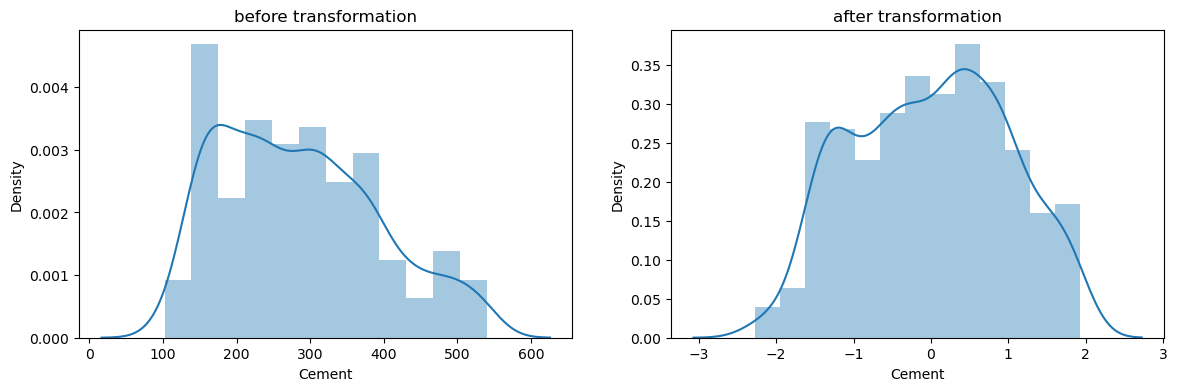

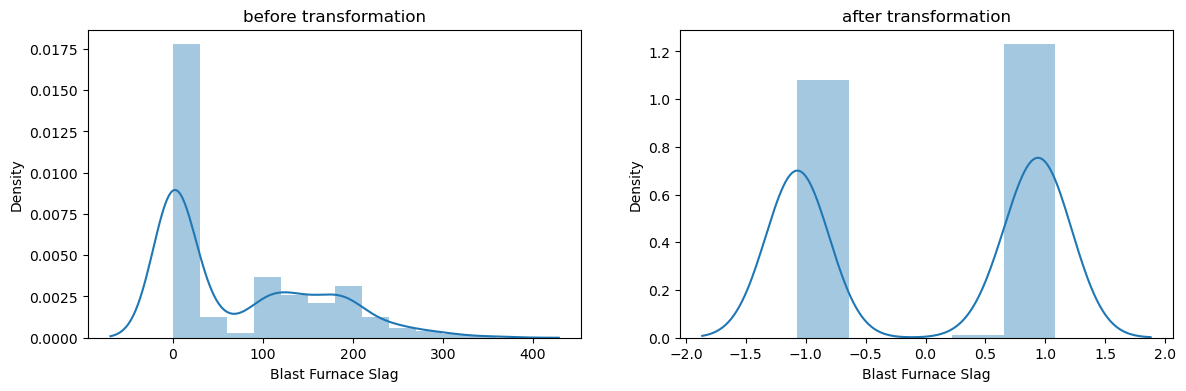

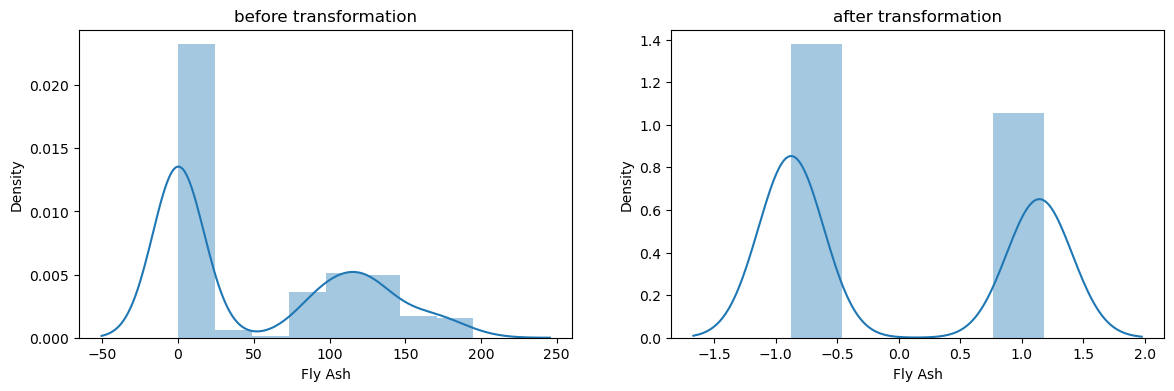

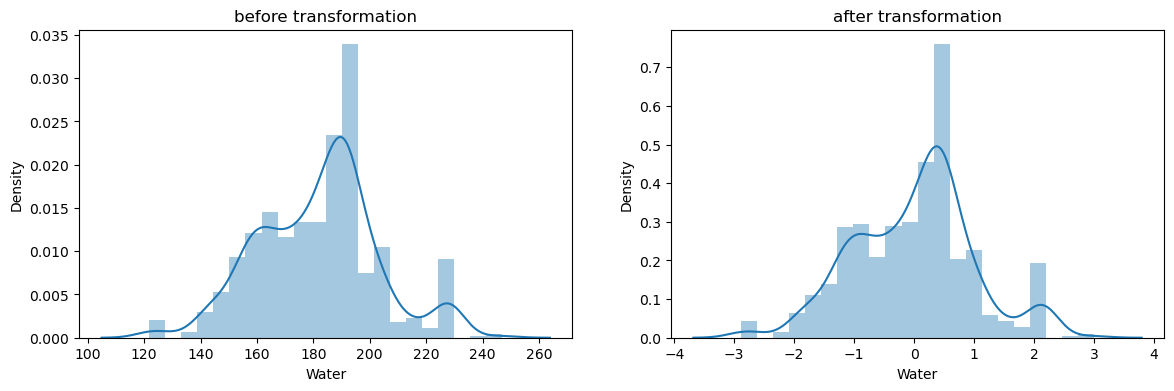

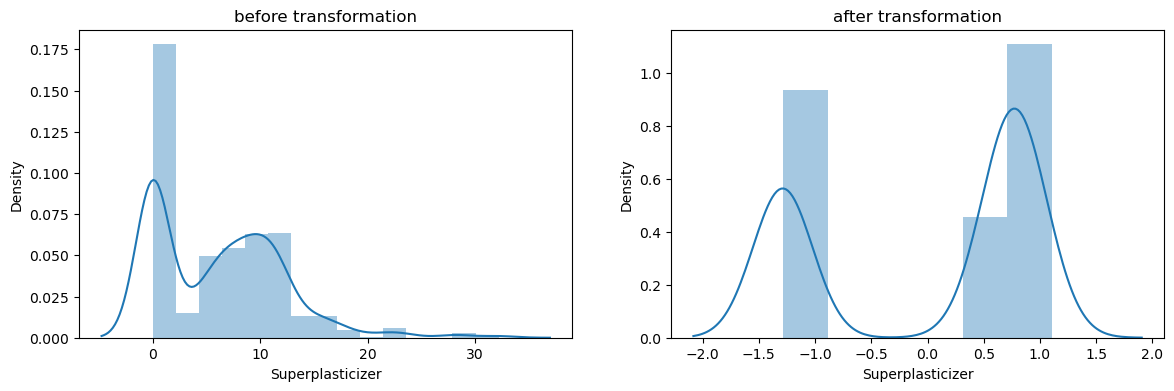

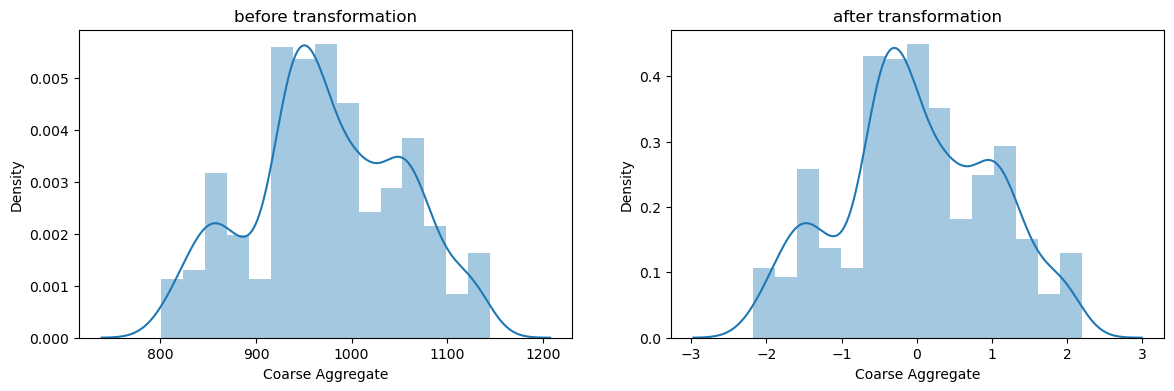

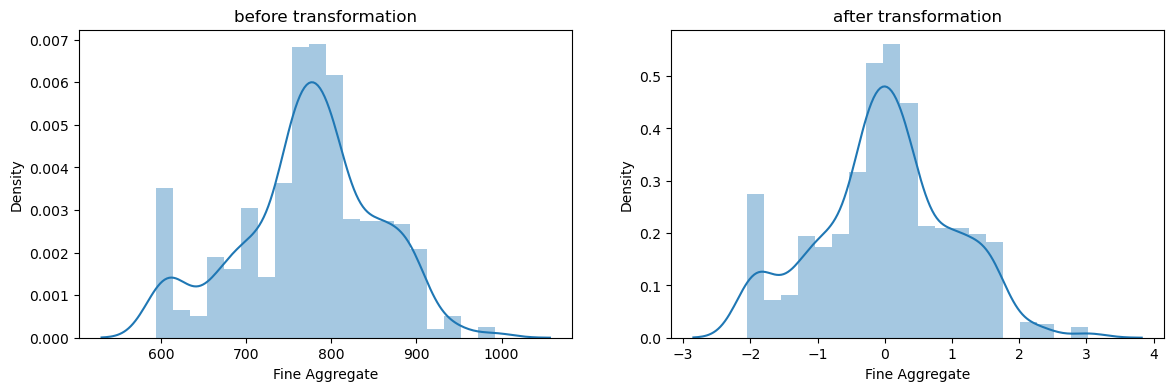

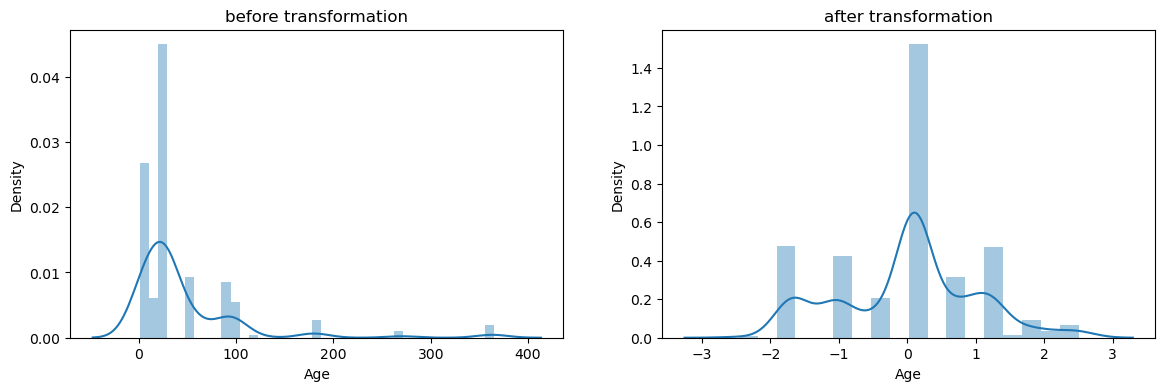

In [20]:
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title("before transformation")
    
    
    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title("after transformation")

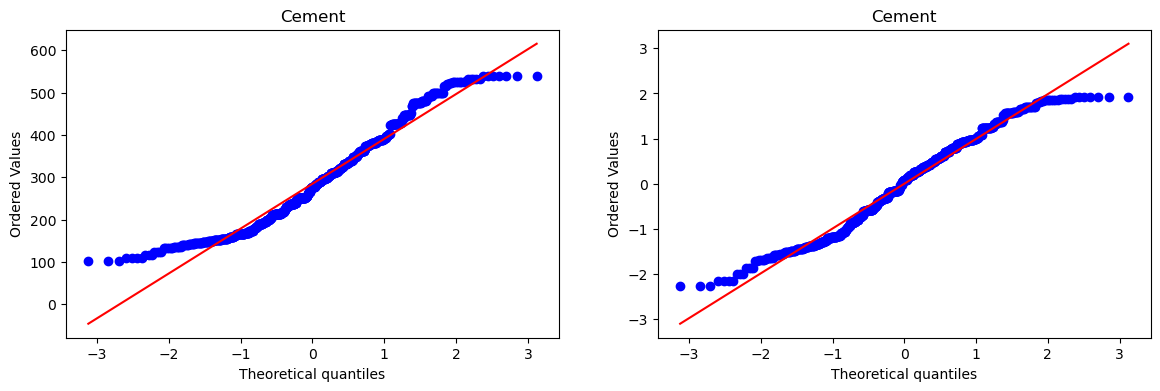

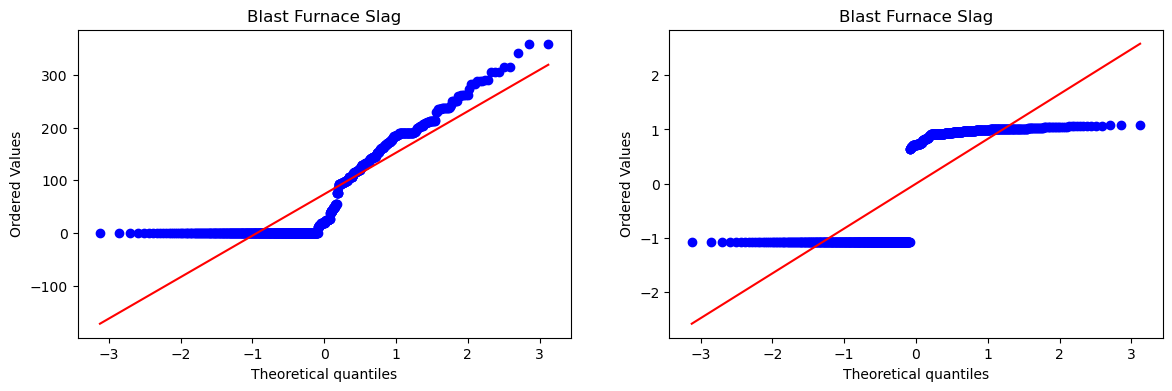

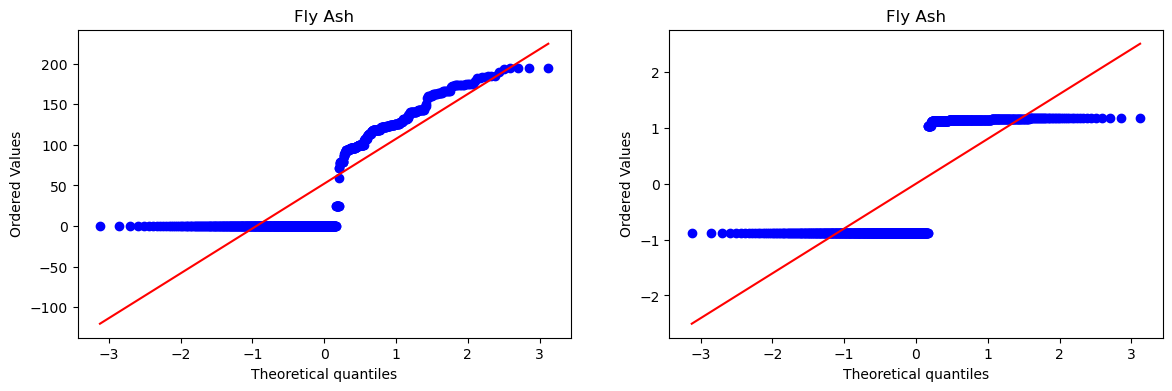

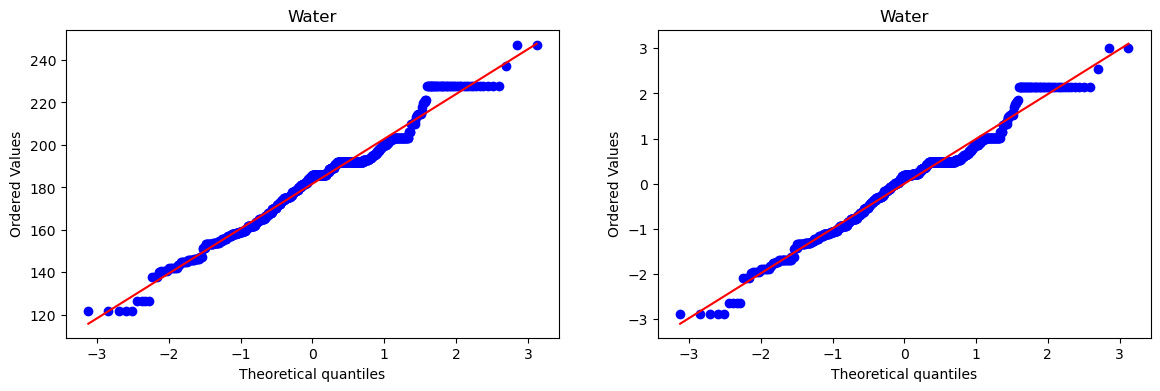

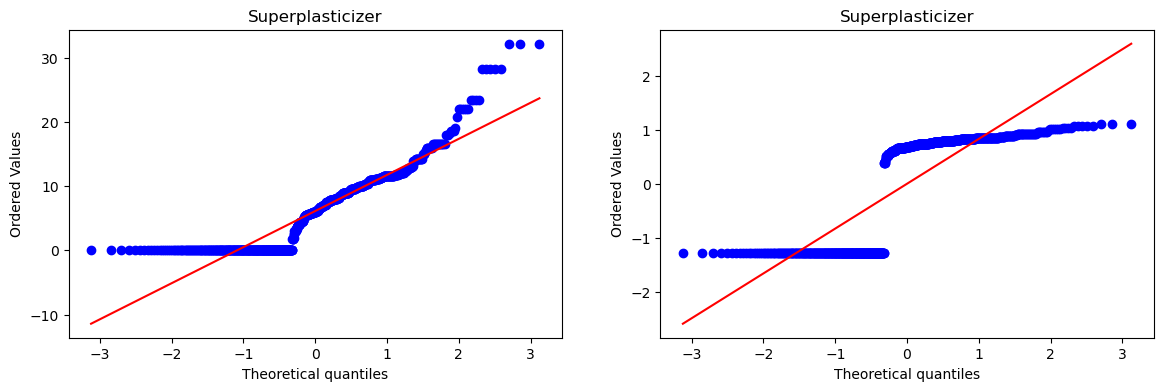

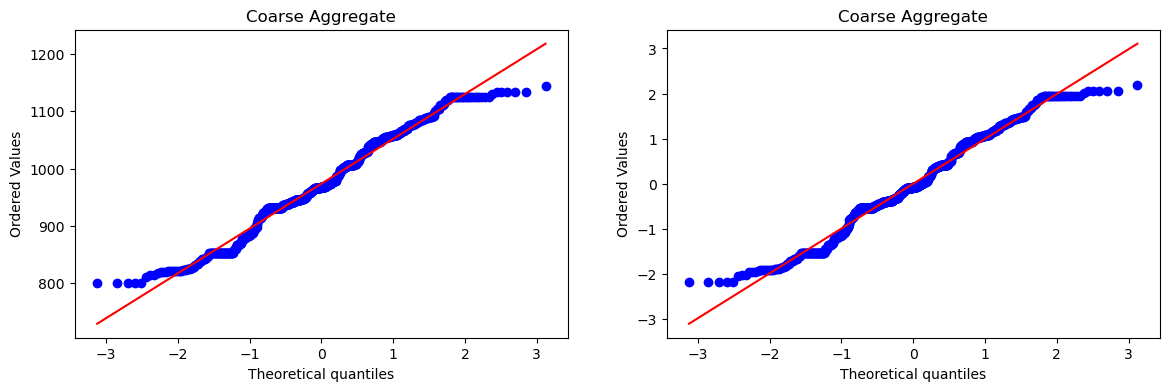

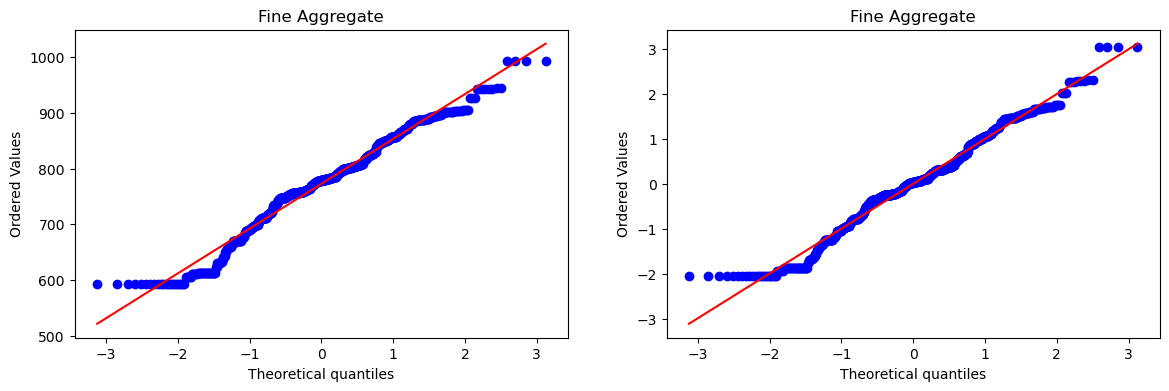

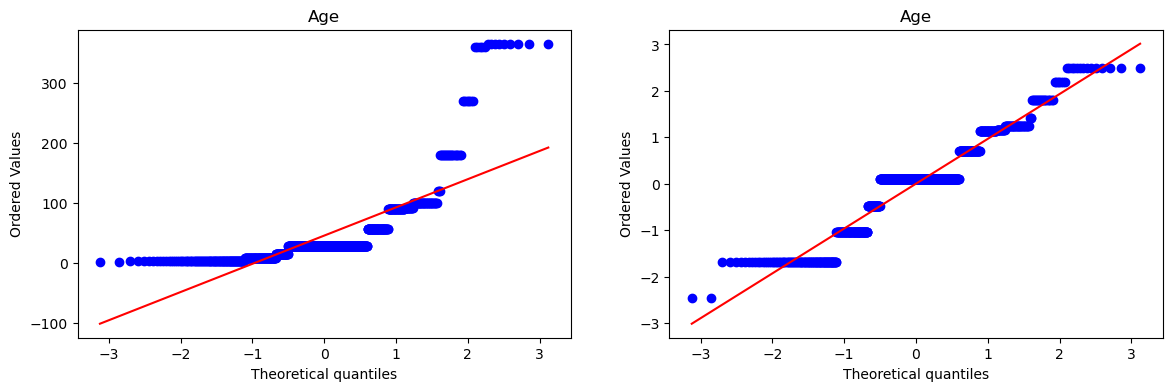

In [21]:
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    
    plt.subplot(122)
    stats.probplot(x_train_transformed[col],dist="norm",plot=plt)
    plt.title(col)

# applying yeo-johnson

In [22]:
pt2=PowerTransformer(method="yeo-johnson",standardize=True) # by default power transformer apply yeo johnson 

In [23]:
# usually yeo-johnson predicts better than box-cox
x_train_transformed2=pt2.fit_transform(x_train)
x_test_transformed2=pt2.transform(x_test)      #  transformation using yeo johnson

lr.fit(x_train_transformed2,y_train)
y_pred3=lr.predict(x_test_transformed2) # prdiction 
r2_score(y_test,y_pred3)

0.8075413188093594

In [24]:
pt2.lambdas_ # lambdas value we got from yeo johnson transformation

array([ 1.91971242e-01,  4.81745888e-04, -1.78000536e-01,  8.50289162e-01,
        2.31695318e-01,  1.12661410e+00,  1.86041579e+00,  1.96827836e-02])

In [25]:
pd.DataFrame({"column":x_train.columns,"yeo-johnson lambda":pt2.lambdas_}) # converted values into dataframe

,column,yeo-johnson lambda
0,Cement,0.191971
1,Blast Furnace Slag,0.000482
2,Fly Ash,-0.178001
3,Water,0.850289
4,Superplasticizer,0.231695
5,Coarse Aggregate,1.126614
6,Fine Aggregate,1.860416
7,Age,0.019683


In [26]:
#lambdas values obtained after both of the transformation

In [27]:
pd.DataFrame({"columns":x_train.columns,"box-cox lambdas":pt.lambdas_,"yeo-johnson lambdas":pt2.lambdas_})

,columns,box-cox lambdas,yeo-johnson lambdas
0,Cement,0.194559,0.191971
1,Blast Furnace Slag,0.020327,0.000482
2,Fly Ash,-0.043355,-0.178001
3,Water,0.851231,0.850289
4,Superplasticizer,0.094299,0.231695
5,Coarse Aggregate,1.126384,1.126614
6,Fine Aggregate,1.859230,1.860416
7,Age,0.066432,0.019683
